In [1]:
%load_ext autoreload
%autoreload 2

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nsidc_processor import GeotiffProcessor

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [5]:
north_geotiff_index = pd.read_csv('daily_northern_geotiff_index.csv', index_col=0)
north_geotiff_index.date = pd.to_datetime(north_geotiff_index.date, infer_datetime_format=True)

In [6]:
conc_index = north_geotiff_index.loc[north_geotiff_index.image_type == 'concentration']
ext_index = north_geotiff_index.loc[north_geotiff_index.image_type == 'extent']

In [7]:
conc_index = conc_index.set_index('date')
ext_index = ext_index.set_index('date')

In [8]:
conc_index.head()

,file_name,hemisphere,image_type
date,,,
1978-10-26,daily/geotiff/1978/N_19781026_concentration_v3...,north,concentration
1978-10-28,daily/geotiff/1978/N_19781028_concentration_v3...,north,concentration
1978-10-30,daily/geotiff/1978/N_19781030_concentration_v3...,north,concentration
1978-11-01,daily/geotiff/1978/N_19781101_concentration_v3...,north,concentration
1978-11-03,daily/geotiff/1978/N_19781103_concentration_v3...,north,concentration


In [9]:
ext_index.head()

,file_name,hemisphere,image_type
date,,,
1978-10-26,daily/geotiff/1978/N_19781026_extent_v3.0.tif,north,extent
1978-10-28,daily/geotiff/1978/N_19781028_extent_v3.0.tif,north,extent
1978-10-30,daily/geotiff/1978/N_19781030_extent_v3.0.tif,north,extent
1978-11-01,daily/geotiff/1978/N_19781101_extent_v3.0.tif,north,extent
1978-11-03,daily/geotiff/1978/N_19781103_extent_v3.0.tif,north,extent


In [10]:
conc_processor = GeotiffProcessor('raw_images/', conc_index)
ext_processor = GeotiffProcessor('raw_images/', ext_index)

In [11]:
conc_index_imputed = conc_processor.impute_missing_index_dates(set_this_index=True)
ext_index_imputed = ext_processor.impute_missing_index_dates(set_this_index=True)

----

In [187]:
test_index = ext_index_imputed.iloc[:2000, :]

In [188]:
test_processor = GeotiffProcessor('raw_images/', test_index)

In [189]:
width = 304
height = 448

In [190]:
test_images = test_processor.process_images_keras_conv()

In [191]:
test_images.shape

(2000, 1, 448, 304)

In [192]:
test_images = test_images.reshape(1, *test_images.shape)

In [193]:
test_images.shape

(1, 2000, 1, 448, 304)

In [194]:
test_images

array([[[[[0.        , 0.        , 0.        , ..., 0.99607843,
           0.99607843, 0.99607843],
          [0.        , 0.        , 0.        , ..., 0.99607843,
           0.99607843, 0.99607843],
          [0.        , 0.        , 0.        , ..., 0.99607843,
           0.99607843, 0.99607843],
          ...,
          [0.99607843, 0.99607843, 0.99607843, ..., 0.        ,
           0.        , 0.        ],
          [0.99607843, 0.99607843, 0.99607843, ..., 0.        ,
           0.        , 0.        ],
          [0.99607843, 0.99607843, 0.99607843, ..., 0.        ,
           0.        , 0.        ]]],


        [[[0.        , 0.        , 0.        , ..., 0.99607843,
           0.99607843, 0.99607843],
          [0.        , 0.        , 0.        , ..., 0.99607843,
           0.99607843, 0.99607843],
          [0.        , 0.        , 0.        , ..., 0.99607843,
           0.99607843, 0.99607843],
          ...,
          [0.99607843, 0.99607843, 0.99607843, ..., 0.        ,
  

----

In [332]:
ext_index_last_2 = conc_index_imputed.loc['2017-01-01':'2018-12-31']

In [333]:
ext_index_last_2

,file_name,hemisphere,image_type
2017-01-01,daily/geotiff/2017/N_20170101_concentration_v3...,north,concentration
2017-01-02,daily/geotiff/2017/N_20170102_concentration_v3...,north,concentration
2017-01-03,daily/geotiff/2017/N_20170103_concentration_v3...,north,concentration
2017-01-04,daily/geotiff/2017/N_20170104_concentration_v3...,north,concentration
2017-01-05,daily/geotiff/2017/N_20170105_concentration_v3...,north,concentration
...,...,...,...
2018-12-27,daily/geotiff/2018/N_20181227_concentration_v3...,north,concentration
2018-12-28,daily/geotiff/2018/N_20181228_concentration_v3...,north,concentration
2018-12-29,daily/geotiff/2018/N_20181229_concentration_v3...,north,concentration
2018-12-30,daily/geotiff/2018/N_20181230_concentration_v3...,north,concentration


In [334]:
trim_processor = GeotiffProcessor('raw_images/', ext_index_last_2)

In [447]:
ext_last2 = trim_processor.process_images_keras_convlstm()

In [448]:
ext_last2.shape

(1, 730, 1, 448, 304)

In [449]:
seq = Sequential()
seq.add(ConvLSTM2D(
    filters=1,
    kernel_size=(4,4),
    input_shape=(None, 1, 448, 304),
    data_format='channels_first',
    return_sequences=True,
    activation='sigmoid',
    padding='same'))

In [465]:
import keras.backend as k

def mean_power_error(y_true, y_pred, p):
    diff = k.abs(y_true - y_pred)
    powered = diff ** p
    return k.mean(powered)

In [466]:
seq.compile(loss=lambda true, pred: mean_power_error(true, pred, 1), optimizer='adadelta')

In [467]:
x_train = ext_last2[:,:365,:,:,:]
y_train = ext_last2[:,1:366,:,:,:]

In [468]:
seq.fit(x_train, y_train, epochs=2)

Epoch 1/2
1/1 [==============================] - 106s 106s/step - loss: 0.5570
Epoch 2/2
1/1 [==============================] - 100s 100s/step - loss: 0.5539


In [469]:
test_seq = ext_last2[:,10:30,:,:,:]

In [470]:
test_pred = seq.predict(test_seq)

In [492]:
test_frame = test_pred[:,15,:,:,:]

In [493]:
test_frame.shape

(1, 1, 448, 304)

In [494]:
test_processor.load_default_colormaps('default_extent_colormap.pkl', 'default_concentration_colormap.pkl')

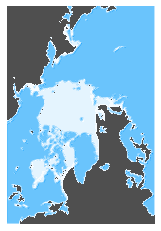

In [495]:
test_processor.make_colored_prediction_image(test_frame, image_type='concentration')

In [496]:
test_processor.scale_from_normal(test_frame, image_type='concentration')

array([[[[ 947, 1078, 1097, ...,  661,  795,  806],
         [ 956, 1117, 1144, ...,  626,  804,  853],
         [ 956, 1117, 1146, ...,  625,  803,  855],
         ...,
         [ 499,  625,  645, ..., 1138, 1102, 1117],
         [ 565,  767,  793, ..., 1048, 1106, 1114],
         [ 589,  850,  882, ..., 1009, 1024, 1040]]]], dtype=uint16)

In [330]:
test_processor.default_extent_cmap

{0: (9, 60, 112, 255),
 1: (255, 255, 255, 255),
 2: (255, 255, 255, 255),
 3: (255, 255, 255, 255),
 4: (255, 255, 255, 255),
 5: (255, 255, 255, 255),
 6: (255, 255, 255, 255),
 7: (255, 255, 255, 255),
 8: (255, 255, 255, 255),
 9: (255, 255, 255, 255),
 10: (255, 255, 255, 255),
 11: (255, 255, 255, 255),
 12: (255, 255, 255, 255),
 13: (255, 255, 255, 255),
 14: (255, 255, 255, 255),
 15: (255, 255, 255, 255),
 16: (255, 255, 255, 255),
 17: (255, 255, 255, 255),
 18: (255, 255, 255, 255),
 19: (255, 255, 255, 255),
 20: (255, 255, 255, 255),
 21: (255, 255, 255, 255),
 22: (255, 255, 255, 255),
 23: (255, 255, 255, 255),
 24: (255, 255, 255, 255),
 25: (255, 255, 255, 255),
 26: (255, 255, 255, 255),
 27: (255, 255, 255, 255),
 28: (255, 255, 255, 255),
 29: (255, 255, 255, 255),
 30: (255, 255, 255, 255),
 31: (255, 255, 255, 255),
 32: (255, 255, 255, 255),
 33: (255, 255, 255, 255),
 34: (255, 255, 255, 255),
 35: (255, 255, 255, 255),
 36: (255, 255, 255, 255),
 37: (255, 255

In [331]:
test_processor.default_concentration_cmap

{0: (9, 60, 112, 255),
 1: (9, 60, 112, 255),
 2: (9, 60, 112, 255),
 3: (9, 60, 112, 255),
 4: (9, 60, 112, 255),
 5: (9, 60, 112, 255),
 6: (9, 60, 112, 255),
 7: (9, 60, 112, 255),
 8: (9, 60, 112, 255),
 9: (9, 60, 112, 255),
 10: (9, 60, 112, 255),
 11: (9, 60, 112, 255),
 12: (9, 60, 112, 255),
 13: (9, 60, 112, 255),
 14: (9, 60, 112, 255),
 15: (9, 60, 112, 255),
 16: (9, 60, 112, 255),
 17: (9, 60, 112, 255),
 18: (9, 60, 112, 255),
 19: (9, 60, 112, 255),
 20: (9, 60, 112, 255),
 21: (9, 60, 112, 255),
 22: (9, 60, 112, 255),
 23: (9, 60, 112, 255),
 24: (9, 60, 112, 255),
 25: (9, 60, 112, 255),
 26: (9, 60, 112, 255),
 27: (9, 60, 112, 255),
 28: (9, 60, 112, 255),
 29: (9, 60, 112, 255),
 30: (9, 60, 112, 255),
 31: (9, 60, 112, 255),
 32: (9, 60, 112, 255),
 33: (9, 60, 112, 255),
 34: (9, 60, 112, 255),
 35: (9, 60, 112, 255),
 36: (9, 60, 112, 255),
 37: (9, 60, 112, 255),
 38: (9, 60, 112, 255),
 39: (9, 60, 112, 255),
 40: (9, 60, 112, 255),
 41: (9, 60, 112, 255),
 4